# Principal Component Analysis

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns

## Importing Dataset

In [2]:
df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
     header=None,
    )

## Feature Scaling

In [3]:
cols = df.columns[1:]

In [4]:
std_scale = preprocessing.StandardScaler()
df[cols] = std_scale.fit_transform(df[cols])

## Find the Most Correlated Columns

Find the most correlated 2 columns in the dataset. Pay attention, that column of index 0 is the column with class info. We want to find the columns that are more correlated with this class column. So that we can compare the effect of PCA.

In [8]:
most_correlated_2_cols = df.corr()[0].apply(lambda x : -abs(x)).argsort()[1:3]
most_correlated_2_df = df[most_correlated_2_cols].values

## Dimensionality Reduction via Principal Component Analysis (PCA)

In [10]:
X_df = df.values[:,1:]
y_df = df.values[:,0]

pca = PCA(n_components=2).fit(X_df)
X_df = pca.transform(X_df)



## Plot the Effect of PCA

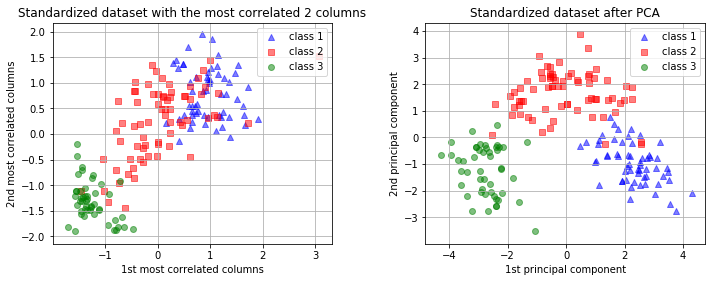

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))

# Plot the dataset using the most correlated 2 columns 
for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(most_correlated_2_df[y_df==l, 0], most_correlated_2_df[y_df==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

ax1.set_title('Standardized dataset with the most correlated 2 columns')    

ax1.set_xlabel('1st most correlated column')
ax1.set_ylabel('2nd most correlated column')
ax1.legend(loc='upper right')
ax1.grid()

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_df[y_df==l, 0], X_df[y_df==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

ax2.set_title('Standardized dataset after PCA')    

ax2.set_xlabel('1st principal component')
ax2.set_ylabel('2nd principal component')
ax2.legend(loc='upper right')
ax2.grid()
    

    
plt.tight_layout(pad = 1.0)



## Conclusion

As you see, 2 features formed via PCA are better at representing the dataset compared to the 2 most correlated columns in the dataset. PCA allows us to construct more informative features which enables a well seperated plot. These features formed via PCA are great assets in classification problems. 